# Final Project Website Conversions

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [165]:
df = pd.read_csv('conversion_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [3]:
df.total_pages_visited.max()

29

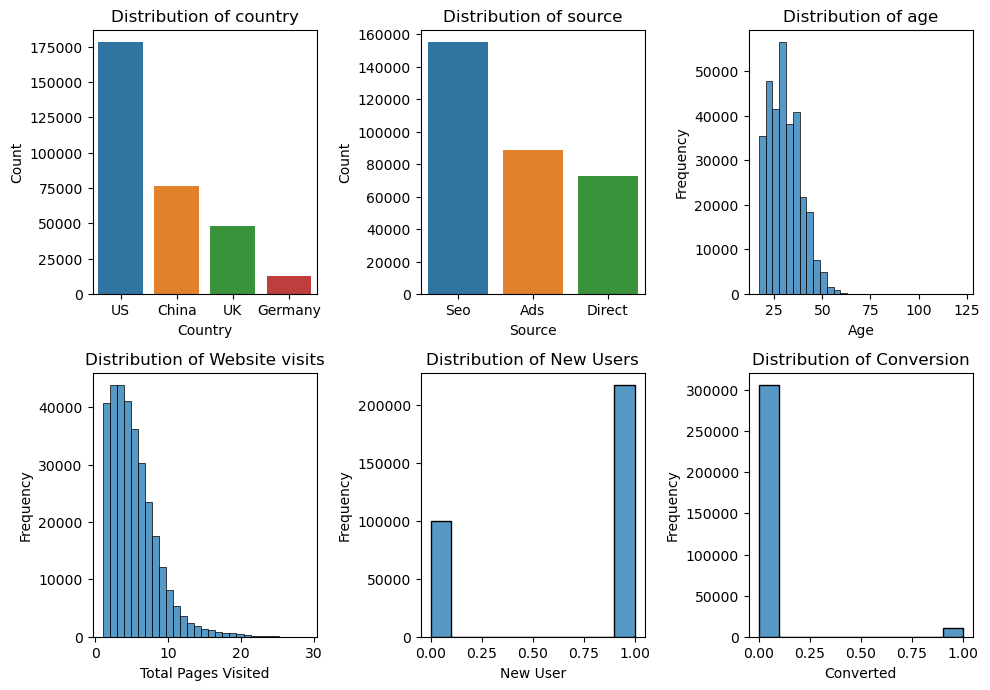

In [4]:
# Visualize the distribution of both numerical and categorical variables
plt.figure(figsize=(10, 10))
plt.subplot(3, 3,1)
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title('Distribution of country')
plt.xlabel('Country')
plt.ylabel('Count')

plt.subplot(3, 3, 2)
sns.countplot(data=df, x='source', order=df['source'].value_counts().index)
plt.title('Distribution of source')
plt.xlabel('Source')
plt.ylabel('Count')

#numericals
plt.subplot(3, 3, 3)
sns.histplot(data=df, x='age', bins=30, kde=False)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(3, 3,4)
sns.histplot(data=df, x='total_pages_visited', bins=29, kde=False)
plt.title('Distribution of Website visits')
plt.xlabel('Total Pages Visited')
plt.ylabel('Frequency')

plt.subplot(3, 3,5)
sns.histplot(data=df, x='new_user', bins=10, kde=False)
plt.title('Distribution of New Users')
plt.xlabel('New User')
plt.ylabel('Frequency')

plt.subplot(3, 3,6)
sns.histplot(data=df, x='converted', bins=10, kde=False)
plt.title('Distribution of Conversion')
plt.xlabel('Converted')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




In [159]:
df.age.mode()

0    30
Name: age, dtype: int64

In [160]:
df.total_pages_visited.mode()

0    2
Name: total_pages_visited, dtype: int64

In [43]:
#check for data imbalance of target variable and to check for Website Conversion Rate 
df['converted'].value_counts(normalize=True) # CR = 3.2%

0    0.967742
1    0.032258
Name: converted, dtype: float64

In [44]:
#Encode Categorical variables using either LabelEncoder and OneHotEncoder, to run classification model

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False)

for column in df.columns:
    if df[column].dtype == 'object':
        # Apply LabelEncoder to the current column
        #df[column + '_LabelEncoded'] = label_encoder.fit_transform(df[column])
        
        # Apply OneHotEncoder to the current column
        encoded_features = one_hot_encoder.fit_transform(df[column].values.reshape(-1, 1))
        encoded_feature_names = one_hot_encoder.get_feature_names_out([column])
        df[encoded_feature_names] = encoded_features

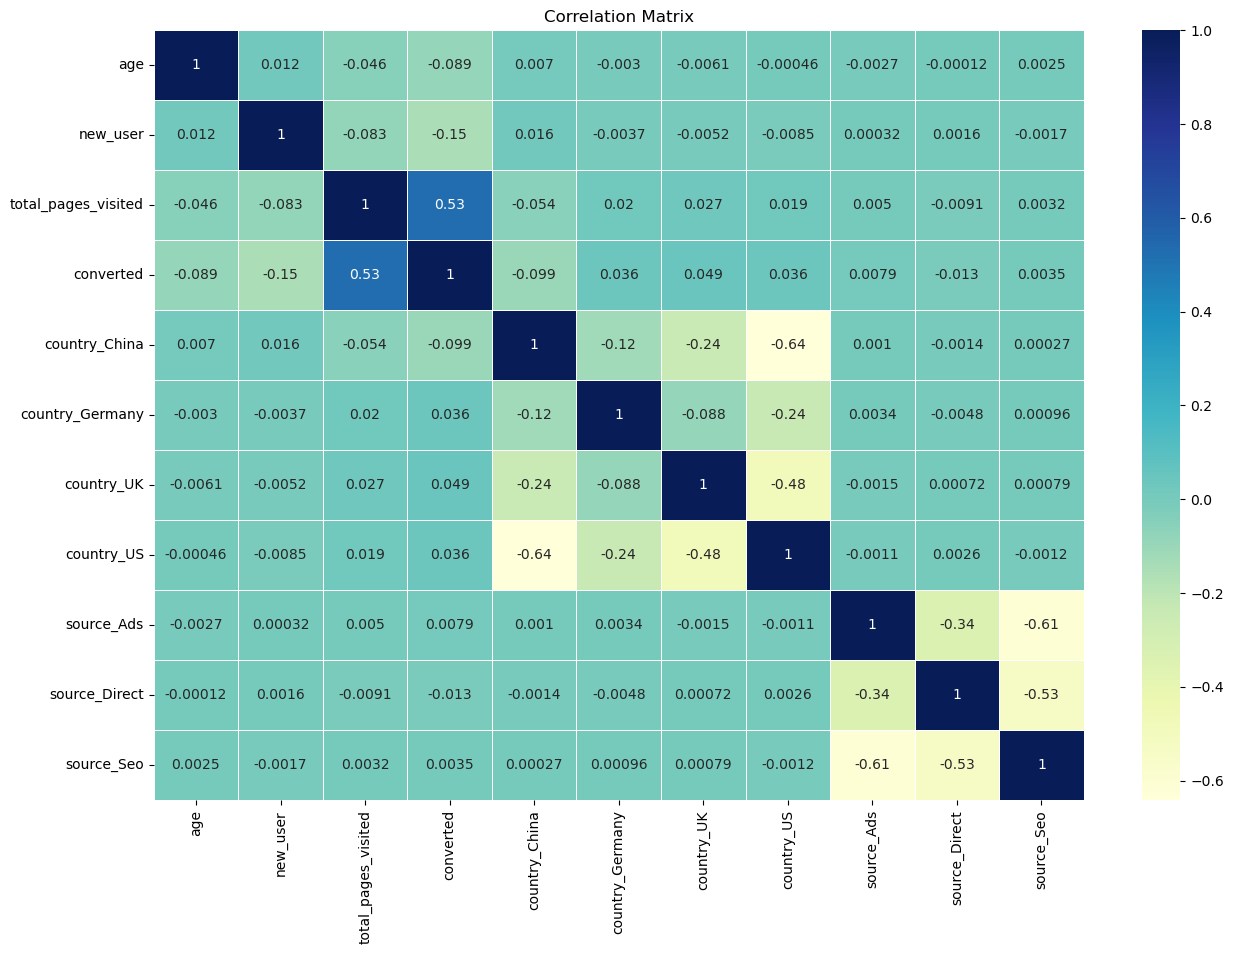

In [45]:
#df = df.drop(columns=['country', 'source'])

correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix with encoded cat_vars
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Model does not contain autorcorrelation (corr >0.9), so I can continue with baseline classification

In [49]:
df.types

AttributeError: 'DataFrame' object has no attribute 'types'

# Classification with imbalanced data

In [139]:
#X,y Split

X = df.drop('converted', axis=1)
y = df[['converted']]

X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,23,1,5,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,28,1,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,39,1,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30,1,6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [140]:
X = X.drop(['country', 'source'], axis=1)
X.head()

KeyError: "['country', 'source'] not found in axis"

In [141]:
X.isnull().sum()

age                    0
new_user               0
total_pages_visited    0
country_China          0
country_Germany        0
country_UK             0
country_US             0
source_Ads             0
source_Direct          0
source_Seo             0
dtype: int64

In [53]:
df = df.drop(['country', 'source'], axis=1)

In [54]:
df.dtypes

age                      int64
new_user                 int64
total_pages_visited      int64
converted                int64
country_China          float64
country_Germany        float64
country_UK             float64
country_US             float64
source_Ads             float64
source_Direct          float64
source_Seo             float64
dtype: object

In [ ]:
df["country_US"] = [float(str(i).replace(",", "")) for i in df["country_US"]]
df.dtypes

#scaled_data = scaler.fit_transform(df)

def contains_string(element):
    return isinstance(element, str)

#Apply the function to check if any element in 'Column1' is a string
if df['country_US'].apply(contains_string).any():
    print('Column1 contains strings')
else:
    print('Column1 does not contain strings')

In [142]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [143]:
#Decision Tree

#hyperparameter-Tuning: find the optimal depth

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # List of depths to test

# Create empty lists to store performance metrics for different depths
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []

for depth in depths:
    # Create a decision tree classifier with the current depth
    model = DecisionTreeClassifier(max_depth=depth)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training and testing data
    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)
    
    # Calculate performance metrics and store them in lists
    train_accuracies.append(accuracy_score(y_train, y_pred_train_dt))
    test_accuracies.append(accuracy_score(y_test, y_pred_test_dt))
    train_precisions.append(precision_score(y_train, y_pred_train_dt))
    test_precisions.append(precision_score(y_test, y_pred_test_dt))
    train_recalls.append(recall_score(y_train, y_pred_train_dt))
    test_recalls.append(recall_score(y_test, y_pred_test_dt))

# Create a DataFrame to display the performance metrics for different depths
performance_df = pd.DataFrame({'Max Depth': depths,
                               'Train Accuracy': train_accuracies,
                               'Test Accuracy': test_accuracies,
                               'Train Precision': train_precisions,
                               'Test Precision': test_precisions,
                               'Train Recall': train_recalls,
                               'Test Recall': test_recalls})

performance_df


,Max Depth,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall
0,1,0.981544,0.981172,0.717617,0.721111,0.701364,0.688450
1,2,0.982136,0.981520,0.894671,0.901561,0.503024,0.485927
2,3,0.984915,0.984472,0.852732,0.854203,0.641018,0.631187
3,4,0.985366,0.984936,0.868431,0.870651,0.641581,0.631511
4,5,0.985394,0.984925,0.870271,0.871256,0.640737,0.630540
5,6,0.986107,0.985747,0.849688,0.847661,0.689408,0.685862
6,7,0.986270,0.985800,0.848220,0.847134,0.697285,0.688450
7,8,0.986442,0.985747,0.841764,0.836364,0.711633,0.699450
8,9,0.986708,0.985653,0.861530,0.847949,0.698410,0.681980
9,10,0.986961,0.985442,0.861496,0.837945,0.707835,0.685862


The highest test accuracy with inbalanced data is achieved at depth 7: 0.9858

In [14]:
#logistic Regression and Scaling

# Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
scaler = StandardScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

log_model = LogisticRegression()

log_model.fit(X_train_scaled, y_train)

y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)



/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.986220,0.985948
1,Precision,0.854498,0.856737
2,Recall,0.688142,0.682951


accuracy at 0.9859

In [144]:
# KNN classification

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [1, 3, 5, 7, 9,11,13]}

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df[['Feature1', 'Feature2']], df['Target'], test_size=0.2, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Extract the best hyperparameters
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['n_neighbors', 'Accuracy', 'Precision', 'Recall', 'F1'])

for n_neighbors in param_grid['n_neighbors']:
    # Create a KNN classifier with the current n_neighbors value
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Fit the model on the training data
    knn.fit(X_train_scaled, y_train)
    
    # Predict on the test data
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results to the DataFrame
    results_df = results_df.append({'n_neighbors': n_neighbors, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)

# Print the results DataFrame
results_df

/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array 

/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array 

,n_neighbors,Accuracy,Precision,Recall,F1
0,1.0,0.978779,0.678595,0.662569,0.670486
1,3.0,0.983470,0.792322,0.667745,0.724719
2,5.0,0.984482,0.820848,0.670010,0.737798
3,7.0,0.984904,0.830610,0.674215,0.744286
4,9.0,0.985062,0.833732,0.676480,0.746919
5,11.0,0.985178,0.839307,0.674215,0.747757
6,13.0,0.984988,0.834873,0.672274,0.744803


highest accuracy at 13 neighbours with an accuracy of 0.985178

In [ ]:
# From all the three Models, Logistic regression achieves the highest results, therefore I base my classification matrix with this one
# because Accuracy is also not the best performance metric to use because it measures 
#the proportion of correct classifications, thus only telling us half the story.


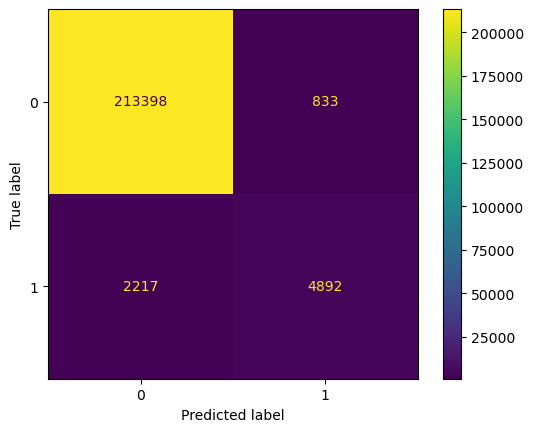

In [15]:
#confusion matrix train set

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()



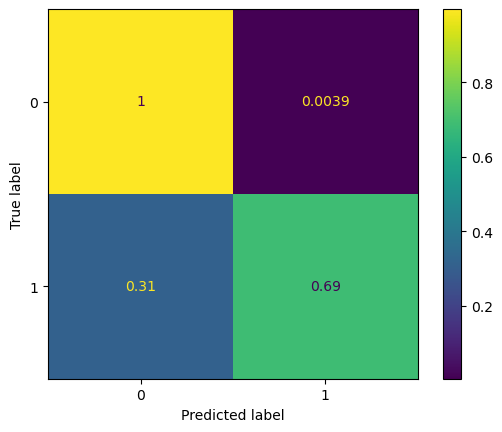

In [16]:
#normalised Confusion matrix for train set
normalized_cm_train = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
disp_nom = ConfusionMatrixDisplay(normalized_cm_train)
disp_nom.plot()

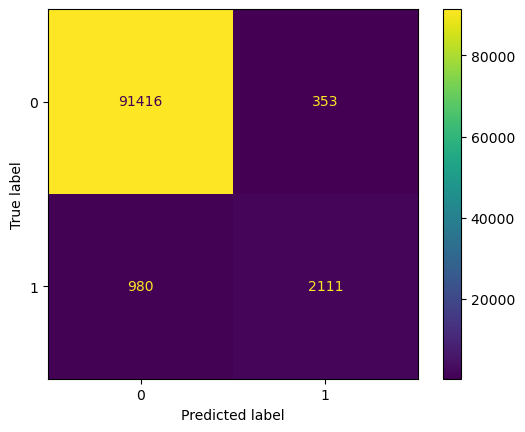

In [17]:
#confusion matrix test set

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test, y_pred_test_log, labels = log_model.classes_)
disp3 = ConfusionMatrixDisplay(cm_test)
disp3.plot()


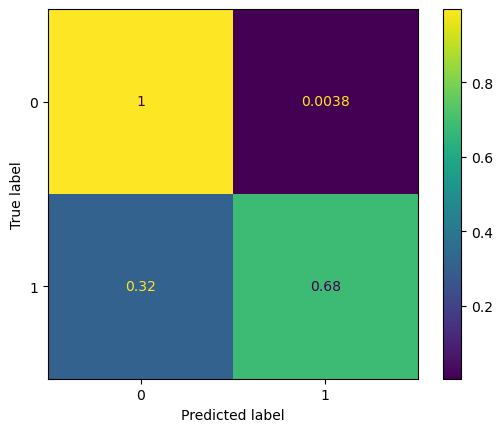

In [18]:
#normalised Confusion matrix for test set
normalized_cm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
disp_nom2 = ConfusionMatrixDisplay(normalized_cm_test)
disp_nom2.plot()

## Balanced Data Resuts

In [73]:
#do train-test split before using smote and use smote only for the train data

X = df.drop('converted',axis=1)
y = df[['converted']]



In [74]:
#logistic regression with balanced y

from imblearn.over_sampling import SMOTE


#use SMOTE upsampling

X_sm, y_sm = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=16)

st = StandardScaler()
st.fit(X_train)
X_train_sc = st.transform(X_train)
X_test_sc = st.transform(X_test)

# Train a logistic regression model
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train_sc, y_train)

y_pred_train_log_up = logistic_regression.predict(X_train_sc)
y_pred_test_log_up = logistic_regression.predict(X_test)


performance_log = pd.DataFrame({'Error_metric_up': ['Accuracy','Precision','Recall'],
                             'Train_up': [accuracy_score(y_train, y_pred_train_log_up),
                                         precision_score(y_train, y_pred_train_log_up),
                                         recall_score(y_train, y_pred_train_log_up)],
                               'Test_up': [accuracy_score(y_test, y_pred_test_log_up),
                                        precision_score(y_test, y_pred_test_log_up),
                                        recall_score(y_test, y_pred_test_log_up)]})

display(performance_log)



/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Error_metric_up,Train_up,Test_up
0,Accuracy,0.944083,0.748203
1,Precision,0.944595,0.665307
2,Recall,0.943612,0.996823


In [55]:
df.dtypes

age                      int64
new_user                 int64
total_pages_visited      int64
converted                int64
country_China          float64
country_Germany        float64
country_UK             float64
country_US             float64
source_Ads             float64
source_Direct          float64
source_Seo             float64
dtype: object

In [56]:
#try downsampling bc the accuracy goes actually down

category_0 = df[df['converted'] == 0] # negative class (majority)
category_1 = df[df['converted'] == 1] # positive class (minority)

In [57]:
print(category_0.shape)
print(category_1.shape)

(306000, 11)
(10200, 11)


In [58]:
c1_len = len(category_1)
c1_len

10200

In [59]:
# downsample the majority class to the size of the positive class using pandas sample method
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(10200, 11)
(10200, 11)


In [62]:
# reassemble the data
df_balanced = pd.concat([category_0_down, category_1], axis=0)
# shuffle the data
df_balanced = df_balanced.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
df_balanced['converted'].value_counts()

0    10200
1    10200
Name: converted, dtype: int64

In [76]:
#X-y split
X_down = df_balanced.drop('converted',axis=1)
y_down = df_balanced[['converted']]

#Training-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size=0.30, random_state=12)

In [77]:
#logistic Regression and Scaling - Downsampled

# Scaler
scaler2 = StandardScaler()

# Fit and transform the data
X_train_scaled_down = scaler2.fit_transform(X_train)
X_test_scaled_down = scaler2.fit_transform(X_test)


log_model = LogisticRegression()

log_model.fit(X_train_scaled_down, y_train)

y_pred_train_log_down = log_model.predict(X_train_scaled_down)
y_pred_test_log_down = log_model.predict(X_test_scaled_down)

performance_log_down = pd.DataFrame({'Error_metric_down': ['Accuracy','Precision','Recall'],
                               'Train_down': [accuracy_score(y_train, y_pred_train_log_down),
                                         precision_score(y_train, y_pred_train_log_down),
                                         recall_score(y_train, y_pred_train_log_down)],
                               'Test_down': [accuracy_score(y_test, y_pred_test_log_down),
                                        precision_score(y_test, y_pred_test_log_down),
                                        recall_score(y_test, y_pred_test_log_down)]})

display(performance_log_down)



/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric_down,Train_down,Test_down
0,Accuracy,0.940336,0.938725
1,Precision,0.942062,0.940328
2,Recall,0.938367,0.936949


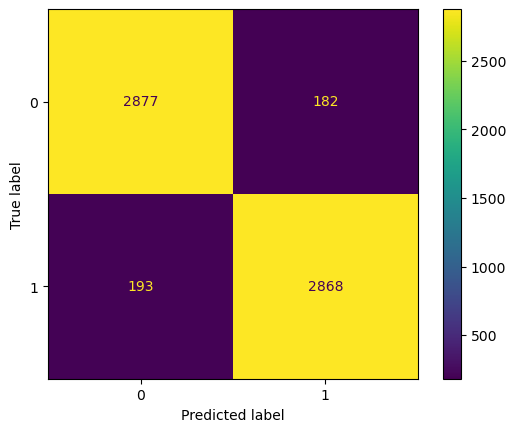

In [78]:
cm_test2 = confusion_matrix(y_test, y_pred_test_log_down, labels = log_model.classes_)
disp4 = ConfusionMatrixDisplay(cm_test2)
disp4.plot()

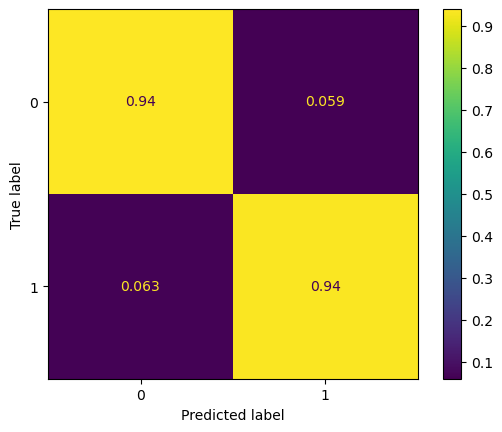

In [79]:
#normalised Confusion matrix for test set
normalized_cm_test2 = cm_test2.astype('float') / cm_test2.sum(axis=1)[:, np.newaxis]
disp_nom3 = ConfusionMatrixDisplay(normalized_cm_test2)
disp_nom3.plot()

# Random Prediction

In [127]:
#choose random sample to make a prediction
n = 1  # number of row-sample

# Get a random sample of n rows from the DataFrame X
r = X_test.sample(n)
r

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
234506,31,0,19,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [128]:
predicted_probabilities = log_model.predict_proba(r)
print(predicted_probabilities)

[[0. 1.]]


/Users/katharina/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [108]:
print('shape clean data:',df.shape)
print('shape balanced data:',df_balanced.shape)
print('shape upsampled X:', X_sm.shape) # accordingly y_sm
print('shape downsampled X:',X_down.shape) # accordingly y_down


shape clean data: (316200, 11)
shape balanced data: (20400, 11)
shape upsampled X: (612000, 10)
shape downsampled X: (20400, 10)


In [122]:
#create data frame with functions and accuracies
model_overview = { 'N x p': ['N','p'],
                'shape clean data': df.shape,
                  'shape balanced data': df_balanced.shape,
                 'shape upsampled X': X_sm.shape,
                 'shape downsampled X': X_down.shape}
model_overview = pd.DataFrame(model_overview)
model_overview

,N x p,shape clean data,shape balanced data,shape upsampled X,shape downsampled X
0,N,316200,20400,612000,20400
1,p,11,11,10,10


In [147]:
accuracy_scores = pd.DataFrame({'Error Metric':['Decision Tree','Logistic Regresssion','KNN',],
                                'Accuracy': ["0.985800","0.985948","0.985178"]})
accuracy_scores

#add or do the same with balanced log reg

,Error Metric,Accuracy
0,Decision Tree,0.985800
1,Logistic Regresssion,0.985948
2,KNN,0.985178


In [149]:
LR_scores = pd.DataFrame({'Logistic Regression':['Smote','Downsampled'],
                                'Accuracy': ["0.748203","0.938725"],
                                 'Precision':["0.665307","0.940328"],
                                 'Recall':["0.996823","0.936949"]})
LR_scores

,Logistic Regression,Accuracy,Precision,Recall
0,Smote,0.748203,0.665307,0.996823
1,Downsampled,0.938725,0.940328,0.936949


In [150]:
df.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,23,1,5,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,28,1,4,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,39,1,5,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30,1,6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [94]:
df.to_csv('clean_data.csv')
df_balanced.to_csv('balanced_data.csv')
X_sm.to_csv('X_smote.csv')
X_down.to_csv('X_downsampled.csv')